In [1]:
import time

start_time = time.time()

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
import string
import numpy as np
import spacy
import pandas as pd
from fuzzywuzzy import fuzz
from nltk.corpus import stopwords
import heapq
import yaml
from nltk.stem import WordNetLemmatizer, PorterStemmer

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from scipy.special import softmax
import numpy as np
from array import array
import copy

nlp = spacy.load('en_core_web_lg')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

df = pd.read_csv('./scraper/archive/javascript.csv', names=["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"])

print(df.shape)
display(df.head())

print("\n")
print("All Columns DF")
df.columns

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(101724, 22)


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,...,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
0,76144358,https://stackoverflow.com/questions/76144358/i...,I'm creating a color blender using Adobe Anima...,\n \n<p>I'm using Adobe Animate...,"('2023-05-01 01:47:04Z',)","('-1',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
1,36280818,https://stackoverflow.com/questions/36280818/h...,How to convert file to base64 in JavaScript?,\n \n<p><strong>UPD</strong> Ty...,"('2016-03-29 09:49:26Z',)","('355',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
2,36280818,https://stackoverflow.com/questions/36280818/h...,How to convert file to base64 in JavaScript?,\n \n<p><strong>UPD</strong> Ty...,"('2016-03-29 09:49:26Z',)","('355',)",NaN,NaN,NaN,NaN,...,Try the solution using the FileReader class:\n...,('\n<p>Try the solution using the <code>FileRe...,"2017-06-09 19:16:52Z, License: CC BY-SA 3.0","('429',)",NaN,NaN,NaN,NaN,NaN,answer
3,36280818,https://stackoverflow.com/questions/36280818/h...,How to convert file to base64 in JavaScript?,\n \n<p><strong>UPD</strong> Ty...,"('2016-03-29 09:49:26Z',)","('355',)",NaN,NaN,NaN,NaN,...,Try the solution using the FileReader class:\n...,('\n<p>Try the solution using the <code>FileRe...,"2017-06-09 19:16:52Z, License: CC BY-SA 3.0","('429',)","('75927236',)",read more about FileReader API: developer.mozi...,('\n \n <span cl...,"Jun 9, 2017 at 19:16","('3',)",answer_comment
4,36280818,https://stackoverflow.com/questions/36280818/h...,How to convert file to base64 in JavaScript?,\n \n<p><strong>UPD</strong> Ty...,"('2016-03-29 09:49:26Z',)","('355',)",NaN,NaN,NaN,NaN,...,Try the solution using the FileReader class:\n...,('\n<p>Try the solution using the <code>FileRe...,"2017-06-09 19:16:52Z, License: CC BY-SA 3.0","('429',)","('81338095',)",I tried to use return reader.result from the g...,('\n \n <span cl...,"Nov 9, 2017 at 5:35","('20',)",answer_comment




All Columns DF


Index(['POSTID', 'POSTLINK', 'POSTTITLE', 'POSTBODY', 'POSTDATE',
       'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME',
       'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERID', 'ANSWERTEXT',
       'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID',
       'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME',
       'ANSWERCMTVOTECOUNTS', 'TYPE'],
      dtype='object')

In [2]:
ALL_COLS = ["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"]

dPOST  = pd.DataFrame(columns=ALL_COLS)
dPOST = df.copy();
dPOST = dPOST.drop(columns=['COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dPOST = dPOST[dPOST['TYPE'] == 'post']
display(dPOST.head(3))

dfPC = pd.DataFrame(columns=ALL_COLS)
dfPC = df.copy();
dfPC = dfPC.drop(columns=['ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dfPC = dfPC[dfPC['TYPE'] == 'post_comment']
display(dfPC.head(3))

dfA = pd.DataFrame(columns=ALL_COLS)
dfA = df.copy();
dfA = dfA.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])

dfAAC = dfA[dfA['TYPE'] == 'answer']
display(dfAAC.head(3))

dFAC = pd.DataFrame(columns=ALL_COLS)
dFAC = df.copy();
dFAC = dFAC.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS'])
dFACT = dFAC[dFAC['TYPE'] == 'answer_comment']
display(dFACT.head(3))

print("Post DF")
print(dPOST.columns)
print('\n')

print("Post Comment DF")
print(dfPC.columns)
print('\n')

print("Answer DF")
print(dfAAC.columns)
print('\n')

print("Answer Comment DF")
print(dFACT.columns)
print('\n')

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,76144358,https://stackoverflow.com/questions/76144358/i...,I'm creating a color blender using Adobe Anima...,\n \n<p>I'm using Adobe Animate...,"('2023-05-01 01:47:04Z',)","('-1',)",post
1,36280818,https://stackoverflow.com/questions/36280818/h...,How to convert file to base64 in JavaScript?,\n \n<p><strong>UPD</strong> Ty...,"('2016-03-29 09:49:26Z',)","('355',)",post
35,76143948,https://stackoverflow.com/questions/76143948/r...,Resize with JavaScript (JQuery),\n \n<p>I want to resize multip...,"('2023-04-30 23:07:53Z',)","('1',)",post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
36,76143948,https://stackoverflow.com/questions/76143948/r...,Resize with JavaScript (JQuery),\n \n<p>I want to resize multip...,"('2023-04-30 23:07:53Z',)","('1',)",comment-134283400,NaN,disinfor,I updated my answer a bit to give another exam...,"2023-05-01 01:21:53Z, License: CC BY-SA 4.0",post_comment
43,76144135,https://stackoverflow.com/questions/76144135/j...,"JavaScript Rock Paper Scissors Game, alert fun...",\n \n<p>I am attempting to make...,"('2023-05-01 00:14:46Z',)","('1',)",comment-134283077,3.0,Unmitigated,You need <code>let Humanity = 0; let AI = 0;</...,"2023-05-01 00:17:01Z, License: CC BY-SA 4.0",post_comment
44,76144135,https://stackoverflow.com/questions/76144135/j...,"JavaScript Rock Paper Scissors Game, alert fun...",\n \n<p>I am attempting to make...,"('2023-05-01 00:14:46Z',)","('1',)",comment-134283099,NaN,Orifjon,Did you check console for error message?,"2023-05-01 00:18:57Z, License: CC BY-SA 4.0",post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
2,36280818,How to convert file to base64 in JavaScript?,36281449.0,Try the solution using the FileReader class:\n...,('\n<p>Try the solution using the <code>FileRe...,"2017-06-09 19:16:52Z, License: CC BY-SA 3.0","('429',)",answer
8,36280818,How to convert file to base64 in JavaScript?,57272491.0,Modern ES6 way (async/await)\nconst toBase64 =...,('\n<p><strong>Modern ES6 way</strong> (async/...,"2020-02-20 00:30:24Z, License: CC BY-SA 4.0","('400',)",answer
14,36280818,How to convert file to base64 in JavaScript?,46639837.0,"If you're after a promise-based solution, this...",('\n<p>If you\'re after a promise-based soluti...,"2018-04-26 08:16:38Z, License: CC BY-SA 3.0","('161',)",answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
3,36280818,How to convert file to base64 in JavaScript?,36281449.0,"('75927236',)",read more about FileReader API: developer.mozi...,('\n \n <span cl...,"Jun 9, 2017 at 19:16","('3',)",answer_comment
4,36280818,How to convert file to base64 in JavaScript?,36281449.0,"('81338095',)",I tried to use return reader.result from the g...,('\n \n <span cl...,"Nov 9, 2017 at 5:35","('20',)",answer_comment
5,36280818,How to convert file to base64 in JavaScript?,36281449.0,"('81381618',)",I made a question out of the above comment if ...,('\n \n <span cl...,"Nov 10, 2017 at 5:21","('2',)",answer_comment


Post DF
Index(['POSTID', 'POSTLINK', 'POSTTITLE', 'POSTBODY', 'POSTDATE',
       'POSTVOTECOUNTS', 'TYPE'],
      dtype='object')


Post Comment DF
Index(['POSTID', 'POSTLINK', 'POSTTITLE', 'POSTBODY', 'POSTDATE',
       'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME',
       'COMMENTTEXT', 'COMMENTDATETIME', 'TYPE'],
      dtype='object')


Answer DF
Index(['POSTID', 'POSTTITLE', 'ANSWERID', 'ANSWERTEXT', 'ANSWERBODY',
       'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'TYPE'],
      dtype='object')


Answer Comment DF
Index(['POSTID', 'POSTTITLE', 'ANSWERID', 'ANSWERCMTID', 'ANSWERCMTTEXT',
       'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS', 'TYPE'],
      dtype='object')




In [3]:
import warnings
warnings.filterwarnings('ignore')

dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r"(", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r")", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r"'", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r",", '')

dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r"(", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r")", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r"'", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r",", '')
display(dPOST.head(1))

dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r"(", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r")", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r"'", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r",", '')

dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r"(", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r")", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r"'", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r",", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r",", '')
dfPC['COMMENTDATETIME'] = dfPC['COMMENTDATETIME'].str.replace(r", License: CC BY-SA 4.0", '')
dfPC['COMMENTUSERNAME'] = dfPC['COMMENTUSERNAME'].str.replace(r"segFault", " ")
display(dfPC.head(1))

dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r"(", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r")", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r"'", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r",", '')

dfAAC['ANSWERDATETIME'] = dfAAC['ANSWERDATETIME'].str.replace(r", License: CC BY-SA 4.0", '')
display(dfAAC.head(1))

dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r"(", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r")", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r"'", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r",", '')

dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r"(", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r")", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r"'", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r",", '')
display(dFACT.head(1))

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,76144358,https://stackoverflow.com/questions/76144358/i...,I'm creating a color blender using Adobe Anima...,\n \n<p>I'm using Adobe Animate...,2023-05-01 01:47:04Z,-1,post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
36,76143948,https://stackoverflow.com/questions/76143948/r...,Resize with JavaScript (JQuery),\n \n<p>I want to resize multip...,2023-04-30 23:07:53Z,1,comment-134283400,NaN,disinfor,I updated my answer a bit to give another exam...,2023-05-01 01:21:53Z,post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
2,36280818,How to convert file to base64 in JavaScript?,36281449.0,Try the solution using the FileReader class:\n...,('\n<p>Try the solution using the <code>FileRe...,"2017-06-09 19:16:52Z, License: CC BY-SA 3.0",429,answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
3,36280818,How to convert file to base64 in JavaScript?,36281449.0,75927236,read more about FileReader API: developer.mozi...,('\n \n <span cl...,"Jun 9, 2017 at 19:16",3,answer_comment


In [4]:
# transform empty values to NaN
dPOST = dPOST.replace(r'^\s*$', np.nan, regex=True)
dfPC = dfPC.replace(r'^\s*$', np.nan, regex=True)
dfAAC = dfAAC.replace(r'^\s*$', np.nan, regex=True)
dFACT = dFACT.replace(r'^\s*$', np.nan, regex=True)

display(dPOST.head(1))
display(dfPC.head(1))
display(dfAAC.head(1))
display(dFACT.head(1))

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,76144358,https://stackoverflow.com/questions/76144358/i...,I'm creating a color blender using Adobe Anima...,\n \n<p>I'm using Adobe Animate...,2023-05-01 01:47:04Z,-1,post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
36,76143948,https://stackoverflow.com/questions/76143948/r...,Resize with JavaScript (JQuery),\n \n<p>I want to resize multip...,2023-04-30 23:07:53Z,1,comment-134283400,NaN,disinfor,I updated my answer a bit to give another exam...,2023-05-01 01:21:53Z,post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
2,36280818,How to convert file to base64 in JavaScript?,36281449.0,Try the solution using the FileReader class:\n...,('\n<p>Try the solution using the <code>FileRe...,"2017-06-09 19:16:52Z, License: CC BY-SA 3.0",429,answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
3,36280818,How to convert file to base64 in JavaScript?,36281449.0,75927236,read more about FileReader API: developer.mozi...,('\n \n <span cl...,"Jun 9, 2017 at 19:16",3,answer_comment


<Axes: >

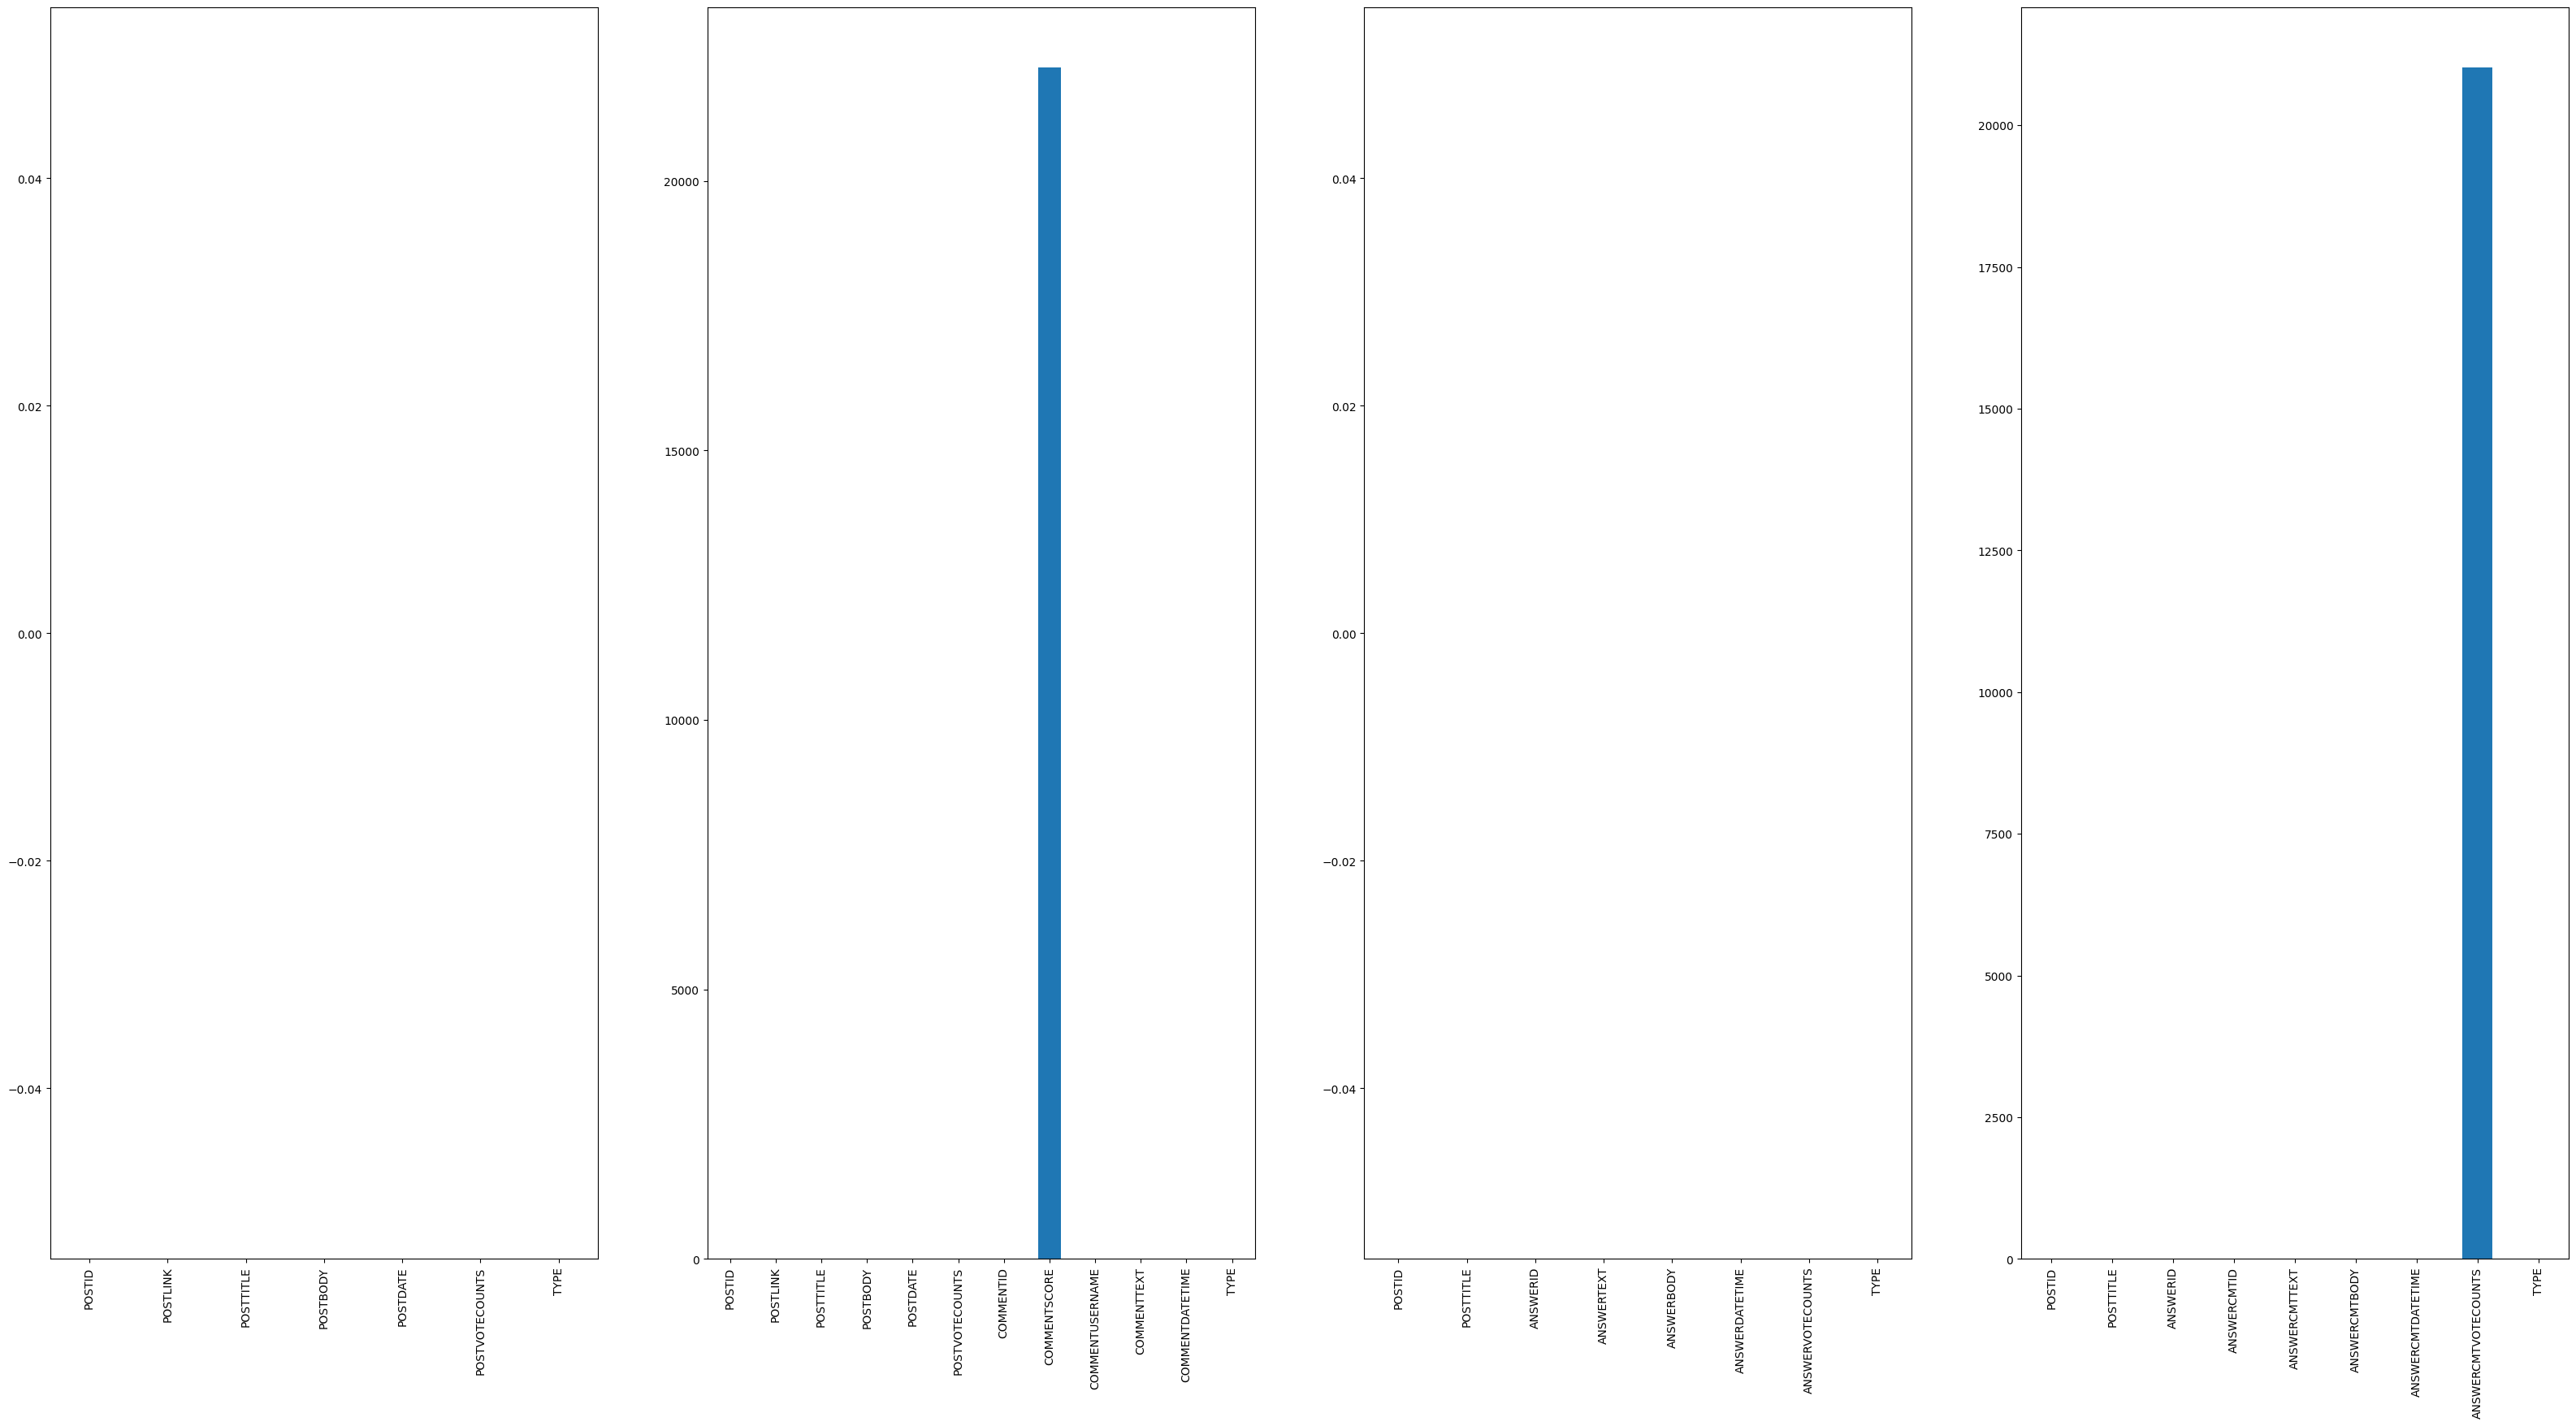

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 4, figsize=(40, 20))
dPOST.isna().sum().plot(kind='bar', ax=axs[0])
dfPC.isna().sum().plot(kind='bar', ax=axs[1])
dfAAC.isna().sum().plot(kind='bar', ax=axs[2])
dFACT.isna().sum().plot(kind='bar', ax=axs[3])

In [6]:
# replace nan values to 0 
dfPC = dfPC.fillna(0)
dFACT = dFACT.fillna(0)

display(dPOST.head(1))
display(dfPC.head(1))
display(dfAAC.head(1))
display(dFACT.head(1))

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,76144358,https://stackoverflow.com/questions/76144358/i...,I'm creating a color blender using Adobe Anima...,\n \n<p>I'm using Adobe Animate...,2023-05-01 01:47:04Z,-1,post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
36,76143948,https://stackoverflow.com/questions/76143948/r...,Resize with JavaScript (JQuery),\n \n<p>I want to resize multip...,2023-04-30 23:07:53Z,1,comment-134283400,0.0,disinfor,I updated my answer a bit to give another exam...,2023-05-01 01:21:53Z,post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
2,36280818,How to convert file to base64 in JavaScript?,36281449.0,Try the solution using the FileReader class:\n...,('\n<p>Try the solution using the <code>FileRe...,"2017-06-09 19:16:52Z, License: CC BY-SA 3.0",429,answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
3,36280818,How to convert file to base64 in JavaScript?,36281449.0,75927236,read more about FileReader API: developer.mozi...,('\n \n <span cl...,"Jun 9, 2017 at 19:16",3,answer_comment


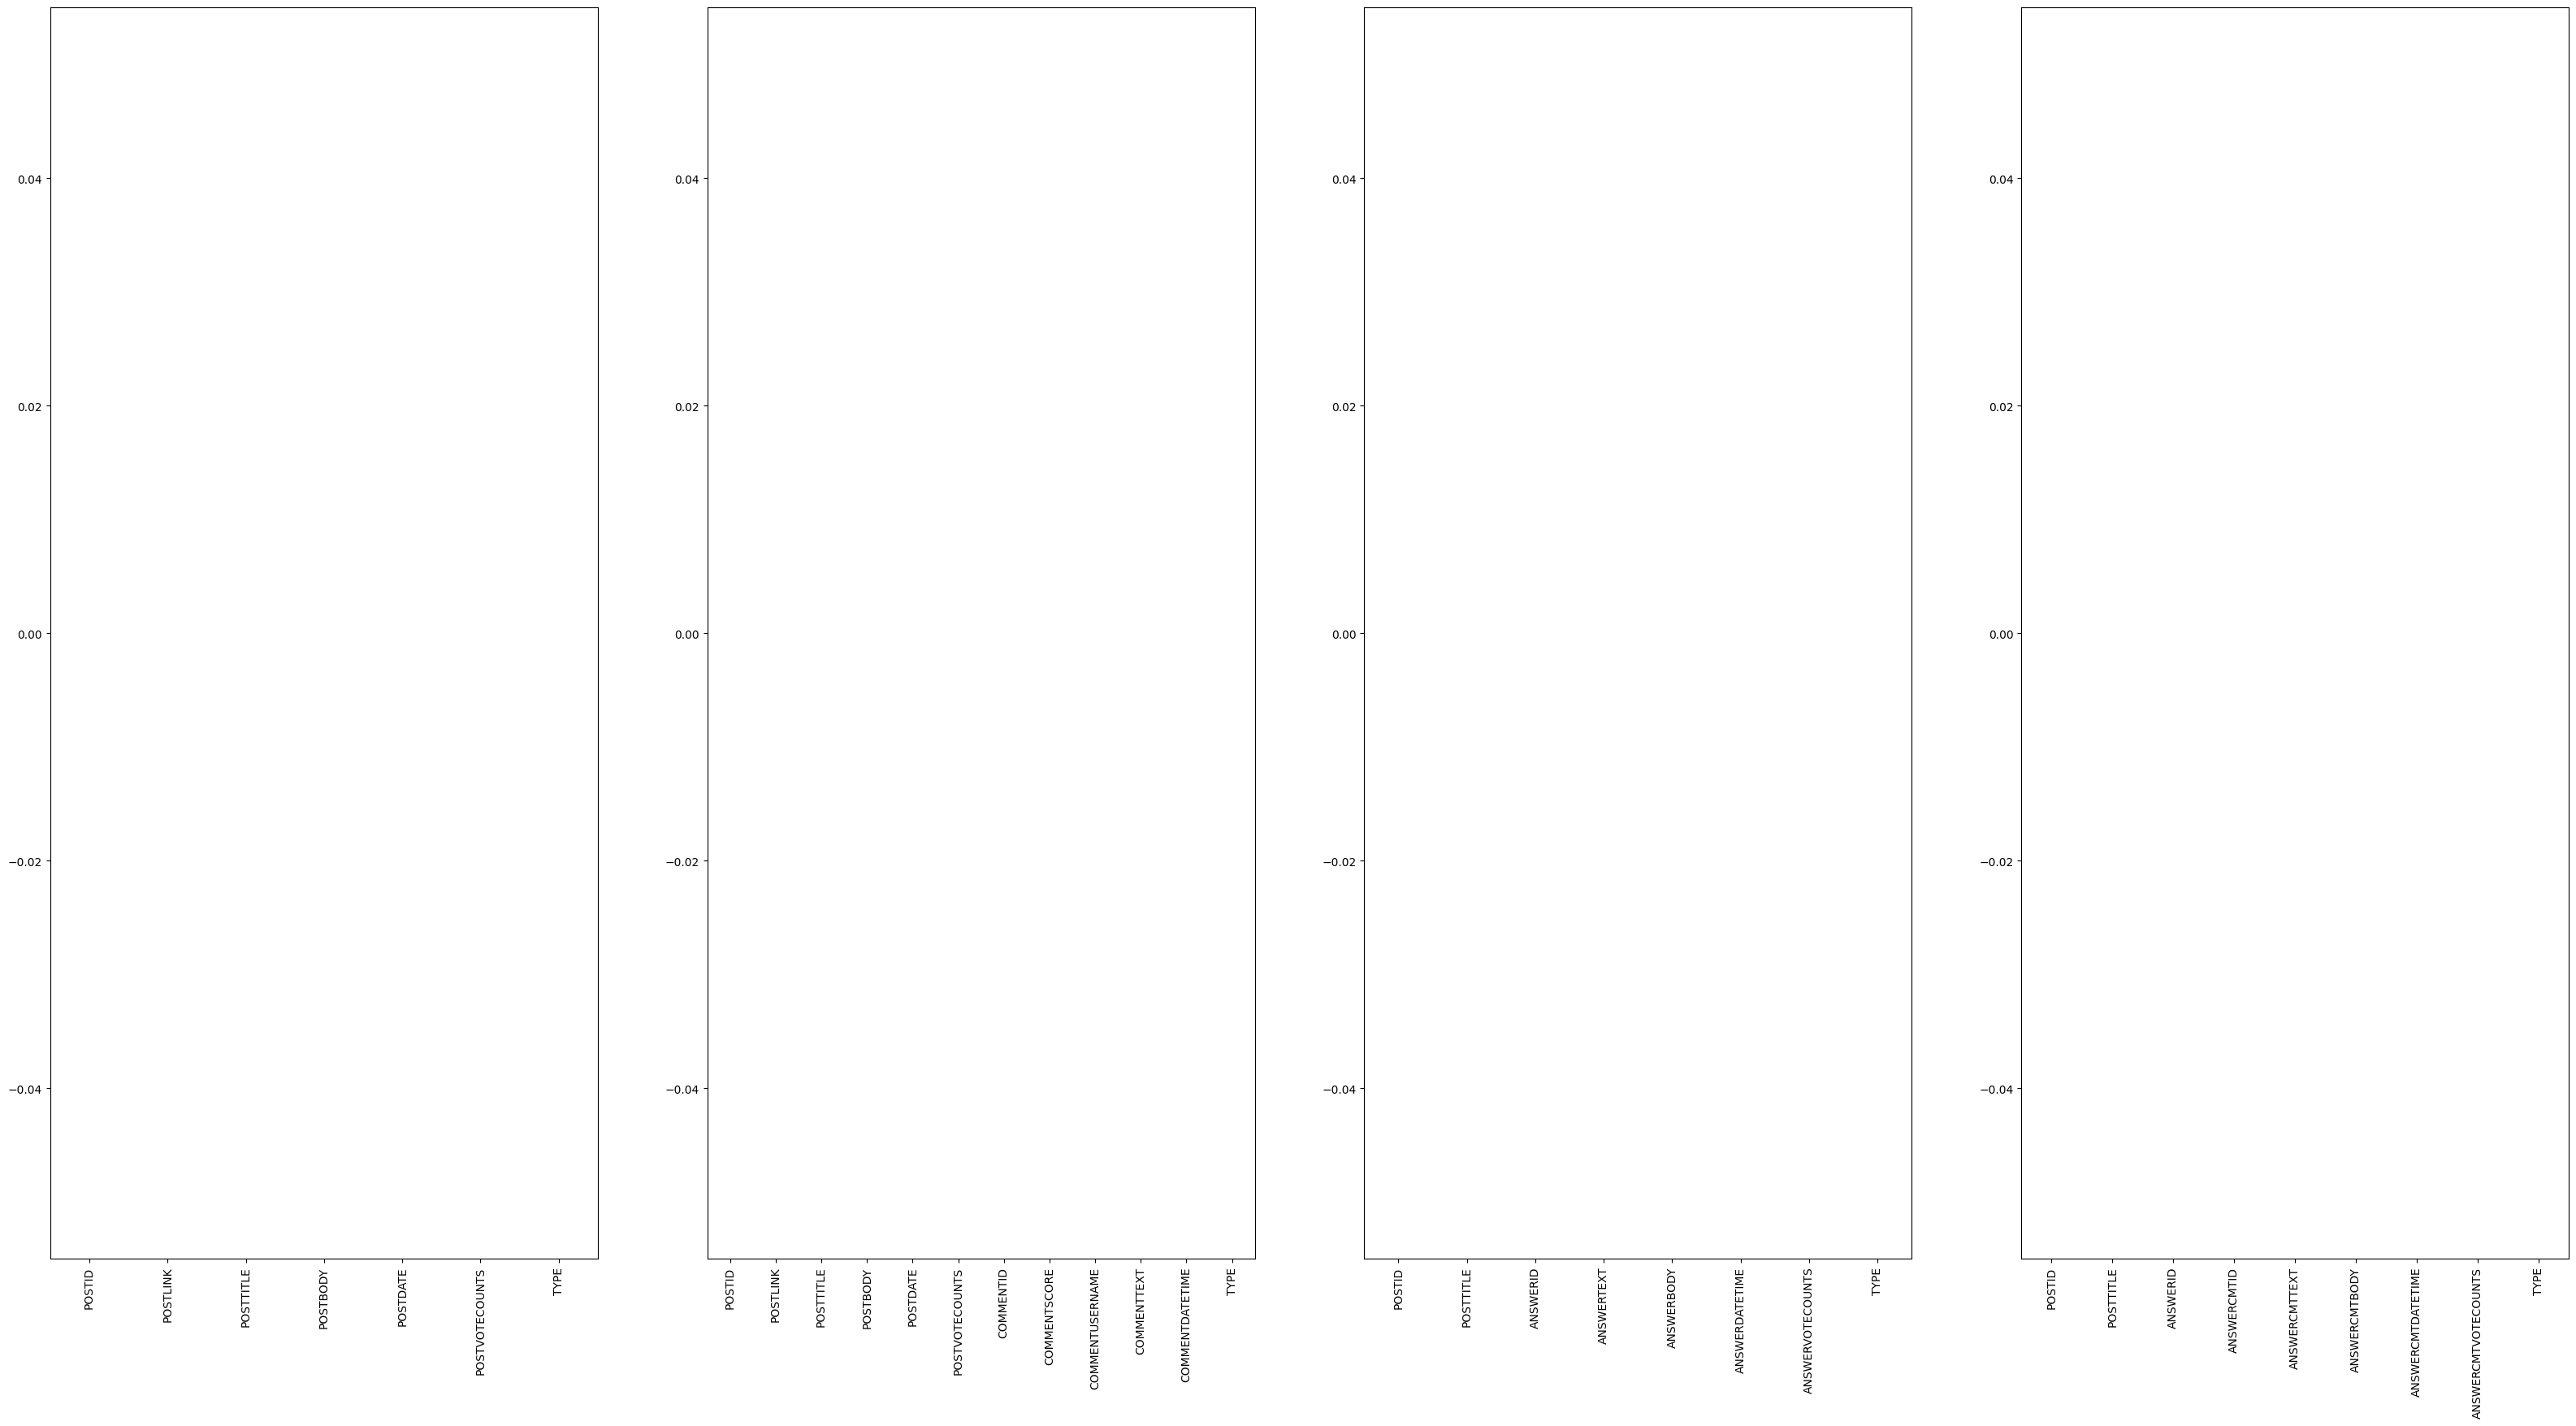

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(40, 20))
dPOST.isna().sum().plot(kind='bar', ax=axs[0])
dfPC.isna().sum().plot(kind='bar' , ax=axs[1])
dfAAC.isna().sum().plot(kind='bar', ax=axs[2])
dFACT.isna().sum().plot(kind='bar', ax=axs[3])
plt.show()

<Axes: xlabel='ANSWERCMTVOTECOUNTS', ylabel='Density'>

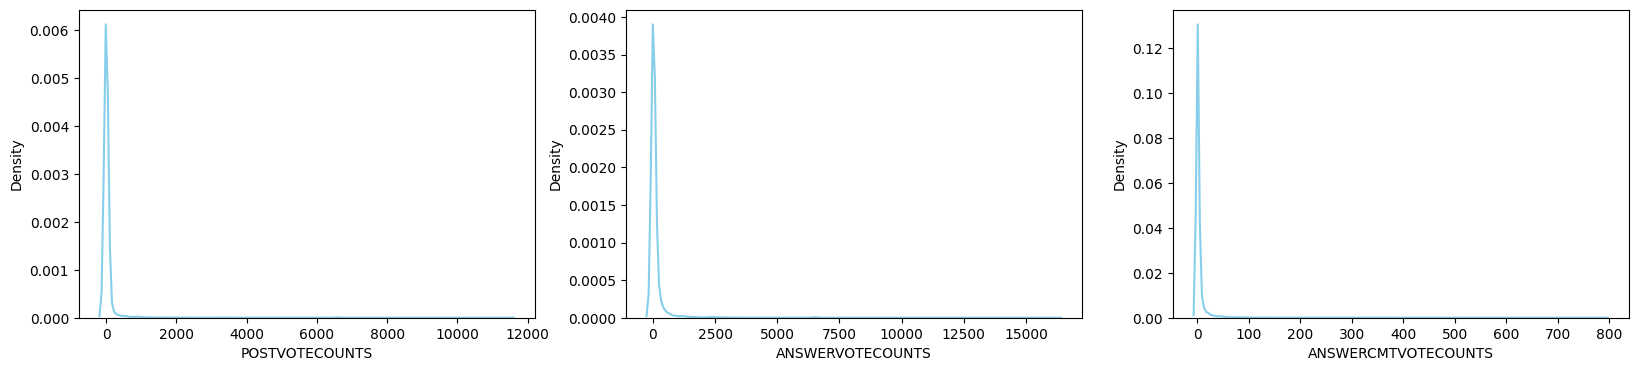

In [8]:
# show vote count distribution
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
sns.distplot(dPOST['POSTVOTECOUNTS'] , color="skyblue", ax=axs[0], bins=range(0, 10, 20))
sns.distplot(dfAAC['ANSWERVOTECOUNTS'] , color="skyblue", ax=axs[1], bins=range(0, 10, 20))
sns.distplot(dFACT['ANSWERCMTVOTECOUNTS'] , color="skyblue", ax=axs[2], bins=range(0, 10, 20))
# specify range 

In [9]:
# reset warnings
warnings.resetwarnings()

In [10]:
# group all dataframes together and set it back to df

df = pd.concat([dPOST, dfPC, dfAAC, dFACT], ignore_index=False)
display(df)

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,...,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS
0,76144358,https://stackoverflow.com/questions/76144358/i...,I'm creating a color blender using Adobe Anima...,\n \n<p>I'm using Adobe Animate...,2023-05-01 01:47:04Z,-1,post,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36280818,https://stackoverflow.com/questions/36280818/h...,How to convert file to base64 in JavaScript?,\n \n<p><strong>UPD</strong> Ty...,2016-03-29 09:49:26Z,355,post,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,76143948,https://stackoverflow.com/questions/76143948/r...,Resize with JavaScript (JQuery),\n \n<p>I want to resize multip...,2023-04-30 23:07:53Z,1,post,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,76144135,https://stackoverflow.com/questions/76144135/j...,"JavaScript Rock Paper Scissors Game, alert fun...",\n \n<p>I am attempting to make...,2023-05-01 00:14:46Z,1,post,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,13264294,https://stackoverflow.com/questions/13264294/j...,javascript ReferenceError on onclick,"\n \n<pre class=""lang-js s-code...",2012-11-07 06:29:56Z,0,post,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101691,74069729,NaN,WebDriverIO + VSC + JavaScript - Xpath with //...,NaN,NaN,NaN,answer_comment,NaN,NaN,NaN,...,74123638.0,NaN,NaN,NaN,NaN,130961195,"As it’s currently written, your answer is uncl...",('\n \n <span cl...,"Oct 23, 2022 at 22:09",0
101711,19910161,NaN,JavaScript calculating date from today date to...,NaN,NaN,NaN,answer_comment,NaN,NaN,NaN,...,54844661.0,NaN,NaN,NaN,NaN,123979171,how can you pick the last month and this month?,('\n \n <span cl...,"Nov 27, 2021 at 14:04",0
101712,19910161,NaN,JavaScript calculating date from today date to...,NaN,NaN,NaN,answer_comment,NaN,NaN,NaN,...,54844661.0,NaN,NaN,NaN,NaN,124000646,@xetryDcoder look in the api docs for your dat...,('\n \n <span cl...,"Nov 28, 2021 at 21:05",0
101713,19910161,NaN,JavaScript calculating date from today date to...,NaN,NaN,NaN,answer_comment,NaN,NaN,NaN,...,54844661.0,NaN,NaN,NaN,NaN,133651353,Thank you. Straight to the point. Exactly what...,('\n \n <span cl...,Mar 17 at 5:46,0


In [11]:
# save it to csv
df.to_csv('./scraper/archive/javascript-clean.csv', index=False)